In [1]:
# Importing important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Data Preprocessing Libraries
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Importing Dataset
df = pd.read_csv('data.csv')

In [5]:
# Displaying first 10 rows of Dataset
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Data Preprocessing and Data Cleaning

In [6]:
# Dropping Loan ID Column
df = df.drop('Loan_ID', axis=1)

In [7]:
# Exploring Categorical Features
for col in df.columns:
    if df[col].dtype == 'O':
        print(f"{col} :\n{dict(df[col].value_counts())}\n")

Gender :
{'Male': 489, 'Female': 112}

Married :
{'Yes': 398, 'No': 213}

Dependents :
{'0': 345, '1': 102, '2': 101, '3+': 51}

Education :
{'Graduate': 480, 'Not Graduate': 134}

Self_Employed :
{'No': 500, 'Yes': 82}

Property_Area :
{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

Loan_Status :
{'Y': 422, 'N': 192}



In [8]:
# Setting up the Encoding Criteria for different Columns
enc = {
    'Gender' : {'Male' : 0, 'Female' : 1},
    'Married' : {'Yes' : 0, 'No' : 1},
    'Dependents' : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3},
    'Education' : {'Graduate' : 0, 'Not Graduate' : 1},
    'Self_Employed' : {'No' : 0, 'Yes' : 1},
    'Property_Area' : {'Semiurban' : 0, 'Urban' : 1, 'Rural' : 2},
    'Loan_Status' : {'Y' : 0, 'N' : 1}
}

# Replacing Values with the Encoded Values
df = df.replace(enc)

In [9]:
# Checking for Null Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Creating Separate Dataframes for Features and Class
X = df.iloc[:, :-1].values
y = df.iloc[:, 11].values

In [11]:
# Creating Instances of Imputer Class for Missing Value Management
imputer_mode = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
# Replacing 'NaN' Values with Mode of the Values in the Respective Columns
X[:7] = imputer_mode.fit_transform(X[:7])
X[8:] = imputer_mode.fit_transform(X[8:])
X[7:8] = imputer_mean.fit_transform(X[7:8])

In [13]:
# Splitting Dataframes into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Model Building and Training

In [14]:
# Classifier List for Model Evaluation
classifiers = ['Decision Tree Classifier', 'Logistic Regression', 'K Nearest Neighbors Classifier', 'Random Forest Classifier']
scores = list()

In [15]:
# Training using Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

In [16]:
# Training using Logistic Regression
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# Training using K Nearest Neighbor Classifier
clf3 = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

In [18]:
# Training using Random Forest Classifier
clf4 = RandomForestClassifier(n_estimators = 20)
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

## Model Evaluation

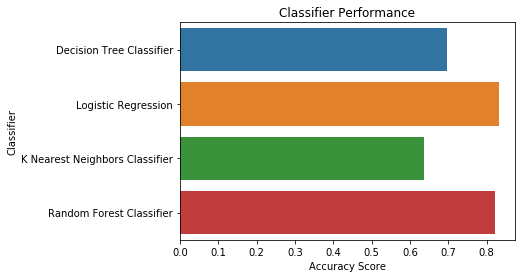

In [19]:
# Plotting a Bar Plot to Evaluate the Performance of different Classifiers
sns.barplot(y=classifiers, x=scores)
plt.xlabel('Accuracy Score')
plt.ylabel('Classifier')
plt.title('Classifier Performance')
plt.show()

### Random Forest Classifier has best Accuracy Score, therefore we'll use it as the Final Model

In [20]:
# Checking on Sample Data
ds = [
    ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
    ['Male', 'No', '0', 'Graduate', 'No', 5849, 0, 8000, 360, 1, 'Urban']
]

In [21]:
# Sample Set Preprocessing
ds = pd.DataFrame(ds[1:], columns=ds[0])
ds = ds.replace(enc)

In [22]:
['Yes' if clf4.predict(ds)[0] == 0 else 'No']

['Yes']